# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
#create dataframe

weather_df = pd.DataFrame(cities)
weather_df.columns = ['City']
weather_df['Cloudiness'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''
weather_df['Humidity'] = ''
weather_df['Lat'] = ''
weather_df['Lng'] = ''
weather_df['Max Temp'] = ''
weather_df['Wind Speed'] = ''

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,,,,,,,,
1,sabla,,,,,,,,
2,port elizabeth,,,,,,,,
3,madras,,,,,,,,
4,bredasdorp,,,,,,,,


In [26]:
# Loop calls to populate dataframe

for index, row in weather_df.iterrows():
    
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    city = row['City']
    fahrenheit = '&units=imperial'
    city_data = f'{url}q={city}{fahrenheit}&appid={api_key}'
    
    print(f'Retrieving results for {city}')
    
    try:
        weather_data = requests.get(city_data).json()
        
        weather_df.loc[index, 'Cloudiness'] = weather_data['clouds']['all']
        weather_df.loc[index, 'Country'] = weather_data['sys']['country']
        weather_df.loc[index, 'Date'] = weather_data['dt']
        weather_df.loc[index, 'Humidity'] = weather_data['main']['humidity']
        weather_df.loc[index, 'Lat'] = weather_data['coord']['lat']
        weather_df.loc[index, 'Lng'] = weather_data['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = weather_data['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = weather_data['wind']['speed']
        
    
    except KeyError as ke:
        print(ke)
    except IndexError as ie:
        print(ie)
    else:
        print('All data found')
              
    print('-----------------')

Retrieving results for busselton
All data found
-----------------
Retrieving results for sabla
All data found
-----------------
Retrieving results for port elizabeth
All data found
-----------------
Retrieving results for madras
All data found
-----------------
Retrieving results for bredasdorp
All data found
-----------------
Retrieving results for bandar-e lengeh
All data found
-----------------
Retrieving results for ust-nera
All data found
-----------------
Retrieving results for mlonggo
All data found
-----------------
Retrieving results for taolanaro
'clouds'
-----------------
Retrieving results for rikitea
All data found
-----------------
Retrieving results for rawson
All data found
-----------------
Retrieving results for albany
All data found
-----------------
Retrieving results for boguchany
All data found
-----------------
Retrieving results for hamilton
All data found
-----------------
Retrieving results for tari
All data found
-----------------
Retrieving results for dikso

All data found
-----------------
Retrieving results for vila velha
All data found
-----------------
Retrieving results for yellowknife
All data found
-----------------
Retrieving results for coquimbo
All data found
-----------------
Retrieving results for kovdor
All data found
-----------------
Retrieving results for roald
All data found
-----------------
Retrieving results for pangnirtung
All data found
-----------------
Retrieving results for punta arenas
All data found
-----------------
Retrieving results for chokurdakh
All data found
-----------------
Retrieving results for hobart
All data found
-----------------
Retrieving results for tasiilaq
All data found
-----------------
Retrieving results for kichmengskiy gorodok
All data found
-----------------
Retrieving results for kodiak
All data found
-----------------
Retrieving results for bethel
All data found
-----------------
Retrieving results for jamestown
All data found
-----------------
Retrieving results for nikolskoye
All dat

All data found
-----------------
Retrieving results for saint-philippe
All data found
-----------------
Retrieving results for itapirapua
All data found
-----------------
Retrieving results for nenton
All data found
-----------------
Retrieving results for grand-santi
All data found
-----------------
Retrieving results for pak kret
All data found
-----------------
Retrieving results for biltine
All data found
-----------------
Retrieving results for dabakala
All data found
-----------------
Retrieving results for husavik
All data found
-----------------
Retrieving results for zeya
All data found
-----------------
Retrieving results for lavrentiya
All data found
-----------------
Retrieving results for dzhusaly
'clouds'
-----------------
Retrieving results for nagapattinam
All data found
-----------------
Retrieving results for yarada
All data found
-----------------
Retrieving results for borama
'clouds'
-----------------
Retrieving results for inirida
All data found
-----------------


All data found
-----------------
Retrieving results for codrington
All data found
-----------------
Retrieving results for xining
All data found
-----------------
Retrieving results for sheboygan
All data found
-----------------
Retrieving results for yagodnoye
All data found
-----------------
Retrieving results for kalianget
All data found
-----------------
Retrieving results for curup
All data found
-----------------
Retrieving results for petropavlovsk-kamchatskiy
All data found
-----------------
Retrieving results for camopi
All data found
-----------------
Retrieving results for onguday
All data found
-----------------
Retrieving results for lakselv
All data found
-----------------
Retrieving results for pisco
All data found
-----------------
Retrieving results for kapuskasing
All data found
-----------------
Retrieving results for yakima
All data found
-----------------
Retrieving results for nara
All data found
-----------------
Retrieving results for emba
All data found
-------

All data found
-----------------
Retrieving results for rungata
'clouds'
-----------------
Retrieving results for kyra
'clouds'
-----------------
Retrieving results for balgazyn
All data found
-----------------
Retrieving results for kilinochchi
All data found
-----------------
Retrieving results for socorro
All data found
-----------------
Retrieving results for rio grande
All data found
-----------------
Retrieving results for jinchang
All data found
-----------------
Retrieving results for pyapon
All data found
-----------------
Retrieving results for port lincoln
All data found
-----------------
Retrieving results for corinth
All data found
-----------------
Retrieving results for khash
All data found
-----------------
Retrieving results for kharan
All data found
-----------------
Retrieving results for victor rosales
'clouds'
-----------------
Retrieving results for cotonou
All data found
-----------------
Retrieving results for sisimiut
All data found
-----------------
Retrieving

In [71]:
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,43,AU,1563398085,80,-33.64,115.35,55,11.52
1,sabla,62,NG,1563398085,40,12.75,4.71,91.91,2.59
2,port elizabeth,1,US,1563398085,52,39.31,-74.98,99,4.7
3,madras,40,US,1563397811,31,44.63,-121.13,82.99,5.82
4,bredasdorp,67,ZA,1563397926,67,-34.53,20.04,64.99,9.17


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [66]:
latitude = pd.to_numeric(weather_df['Lat'], errors='coerce')
temp = weather_df['Max Temp']
humidity = weather_df['Humidity']
cloudiness = weather_df['Cloudiness']
wind = weather_df['Wind Speed']

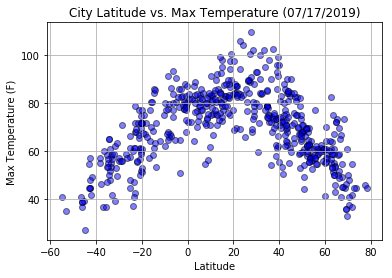

In [75]:
plt.scatter(latitude, temp, c='blue', edgecolor='black', alpha=0.5)

plt.title("City Latitude vs. Max Temperature (07/17/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("output_data/temperature.png")

#### Latitude vs. Humidity Plot

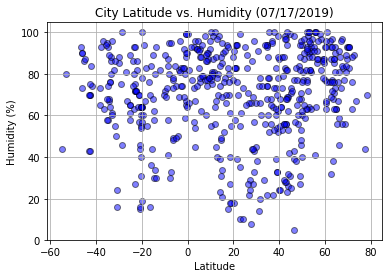

In [76]:
plt.scatter(latitude, humidity, c='blue', edgecolor='black', alpha=0.5)

plt.title("City Latitude vs. Humidity (07/17/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output_data/humidity.png")

#### Latitude vs. Cloudiness Plot

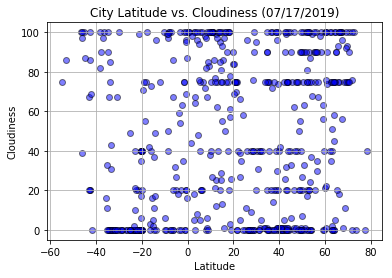

In [77]:
plt.scatter(latitude, cloudiness, c='blue', edgecolor='black', alpha=0.5)

plt.title("City Latitude vs. Cloudiness (07/17/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("output_data/cloudiness.png")

#### Latitude vs. Wind Speed Plot

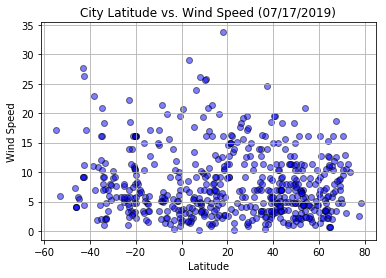

In [78]:
plt.scatter(latitude, wind, c='blue', edgecolor='black', alpha=0.5)

plt.title("City Latitude vs. Wind Speed (07/17/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("output_data/wind.png")